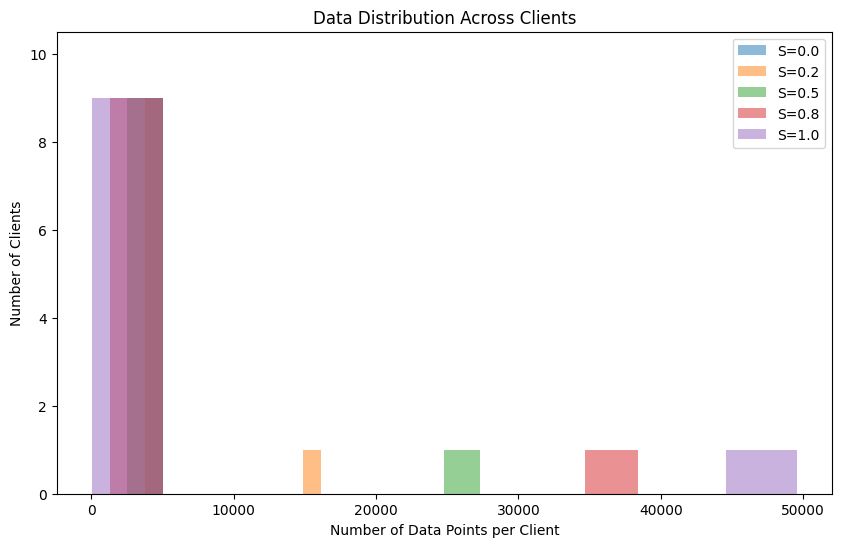

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_data_distribution(num_clients, total_data_points=50000, S=0):
    if S < 0 or S > 1:
        raise ValueError("S must be between 0 and 1.")
    
    min_points = 50
    max_points = total_data_points - (num_clients - 1) * min_points

    # Calculate the extreme distribution
    extreme_distribution = np.array([max_points] + [min_points] * (num_clients - 1))
    
    # Calculate the flat distribution
    flat_distribution = np.full(num_clients, total_data_points / num_clients)
    
    # Interpolate between the flat and extreme distribution based on S
    distribution = (1 - S) * flat_distribution + S * extreme_distribution
    
    # Ensure the total adds up to total_data_points
    distribution = np.round(distribution).astype(int)
    distribution[-1] += total_data_points - np.sum(distribution)  # Adjust last element
    
    # Sort to visualize the upside-down normal shape more clearly
    distribution.sort()
    
    return distribution

# Example usage
num_clients = 10
total_data_points = 50000

distributions = {}
for S in [0, 0.25, 0.5, 0.75, 1]:
    distributions[S] = calculate_data_distribution(num_clients, total_data_points, S)

# Plotting the distributions as histograms
fig, ax = plt.subplots(figsize=(10, 6))
for S, distribution in distributions.items():
    ax.hist(distribution, alpha=0.5, label=f'S={S:.1f}')

ax.set_xlabel('Number of Data Points per Client')
ax.set_ylabel('Number of Clients')
ax.set_title('Data Distribution Across Clients')
ax.legend()
plt.show()

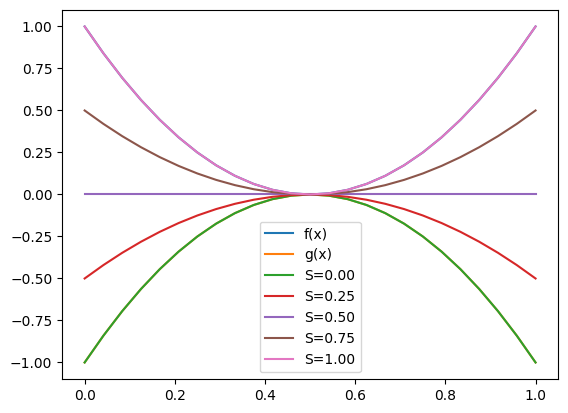

In [33]:
clients = 25
total_data_points = 50000

avg = total_data_points / clients

def f(x):
    return (1-2*x)**2

def g(x):
    return -f(x)

def k(x, S=0.5):
    return S * f(x) + (1-S) * g(x)

xs = np.linspace(0, 1, clients)

plt.plot(xs, [f(x) for x in xs], label='f(x)')
plt.plot(xs, [g(x) for x in xs], label='g(x)')
for S in [0, 0.25, 0.5, 0.75, 1]:
    plt.plot(xs, [k(x,S) for x in xs], label=f'S={S:.2f}')
plt.legend()
plt.show()


In [34]:
total = []
mi =  200
ma = 3800
for i in np.linspace(0,1,25):
    total.append(k(i,0.1))

print(sum(total))
print(total)

-7.2222222222222205
[-0.8, -0.6722222222222222, -0.5555555555555557, -0.44999999999999996, -0.3555555555555556, -0.2722222222222223, -0.2, -0.13888888888888895, -0.0888888888888889, -0.05, -0.022222222222222244, -0.005555555555555561, 0.0, -0.005555555555555546, -0.022222222222222185, -0.05, -0.08888888888888885, -0.13888888888888878, -0.2, -0.27222222222222214, -0.3555555555555554, -0.44999999999999996, -0.5555555555555555, -0.672222222222222, -0.8]


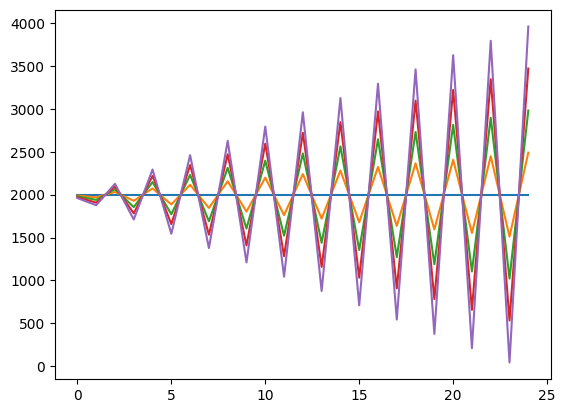

In [58]:
import numpy as np
import matplotlib.pyplot as plt
def generate_deterministic_partitions(T, N, S):
    """
    Generates N partitions from T datapoints based on the parameter S deterministically.
    
    Parameters:
    T (int): Total number of datapoints.
    N (int): Number of partitions.
    S (float): Modulation parameter (0 <= S <= 1).
    
    Returns:
    List[int]: A list of sizes of each partition.
    """
    
    if S < 0 or S > 1:
        raise ValueError("S should be between 0 and 1")
    
    # Base size for each partition
    base_size = T // N
    remainder = T % N
    
    # Initialize partitions with the base size
    partitions = [base_size] * N
    
    # Distribute the remainder
    for i in range(remainder):
        partitions[i] += 1
    
    # Apply deterministic variation based on S
    max_variation = base_size * S
    for i in range(N):
        variation = int(max_variation * (i / (N - 1)) * ((-1) ** i))
        partitions[i] = max(1, partitions[i] + variation)
    
    # Adjust partitions to ensure the sum is T
    current_sum = sum(partitions)
    diff = T - current_sum
    
    # Adjust the partitions to fix the difference
    for i in range(abs(diff)):
        index = i % N
        if diff > 0:
            partitions[index] += 1
        else:
            if partitions[index] > 1:
                partitions[index] -= 1
    
    return partitions

# Example usage:
T = 50000  # Total number of datapoints
N = 25    # Number of partitions
S = 0.5   # Modulation parameter

partitions = generate_deterministic_partitions(T, N, S)


for S in [0, 0.25, 0.5, 0.75, 1]:
    partitions = generate_deterministic_partitions(T, N, S)
    plt.plot(range(25), partitions)

[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
[681, 815, 838, 1084, 1409, 1413, 1475, 1507, 1561, 1618, 1716, 1748, 1862, 1906, 2032, 2397, 2427, 2462, 2661, 2765, 2833, 3028, 3179, 3223, 3360]
[519, 519, 519, 519, 519, 519, 523, 999, 1173, 1238, 1528, 1622, 1837, 1930, 2046, 2259, 2769, 2817, 2890, 3264, 3694, 3813, 4060, 4185, 4239]


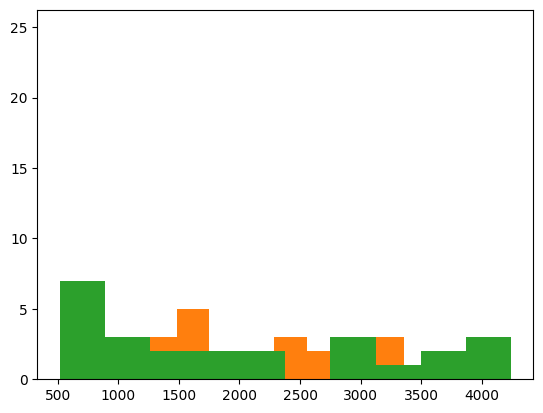

In [23]:
import numpy as np
import matplotlib.pyplot as plt



def generate_partitions_normal(T, N, S):
    """
    Generates N partitions from T datapoints based on the parameter S.
    
    Parameters:
    T (int): Total number of datapoints.
    N (int): Number of partitions.
    S (float): Modulation parameter (0 <= S <= 1).
    
    Returns:
    List[int]: A list of sizes of each partition.
    """
    
    if S < 0 or S > 1:
        raise ValueError("S should be between 0 and 1")
    
    # If S is 0, all partitions have equal size
    if S == 0:
        return [T // N + (1 if i < T % N else 0) for i in range(N)]
    
    # Create a normal distribution with mean T/N and standard deviation modulated by S
    mean_size = T / N
    stddev = mean_size * S
    
    # Generate normal distribution sizes and ensure they sum up to T
    sizes = np.random.normal(loc=mean_size, scale=stddev, size=N)
    
    # Ensure all sizes are positive and integers
    sizes = np.maximum(100, sizes).astype(int)
    sizes = np.minimum(4000, sizes).astype(int)
    
    # Adjust sizes to ensure they sum to T
    diff = T - sizes.sum()
    while diff != 0:
        if diff > 0:
            for i in range(diff):
                sizes[i % N] += 1
        elif diff < 0:
            for i in range(-diff):
                if sizes[i % N] > 1:
                    sizes[i % N] -= 1
        diff = T - sizes.sum()
    
    return sizes.tolist()

# Example usage:
T = 50000  # Total number of datapoints
N = 25    # Number of partitions
S = 1   # Modulation parameter

# partitions = generate_partitions_normal(T, N, S)
# partitions.sort()
# print(partitions)

# plt.hist(partitions, bins=25, rwidth=0.9)
for S in [0, 0.5, 1]:
    # np.random.seed(int(S*1000))
    partitions = generate_partitions_normal(T, N, S)
    partitions.sort()
    print(partitions)
    plt.hist(partitions, bins=10)

[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
[1040, 1119, 1200, 1280, 1361, 1440, 1520, 1600, 1680, 1760, 1841, 1920, 2000, 2080, 2160, 2240, 2320, 2400, 2479, 2560, 2640, 2720, 2800, 2880, 2960]
[81, 239, 400, 560, 721, 880, 1040, 1200, 1360, 1520, 1681, 1840, 2000, 2160, 2320, 2480, 2640, 2800, 2959, 3120, 3280, 3440, 3600, 3759, 3920]


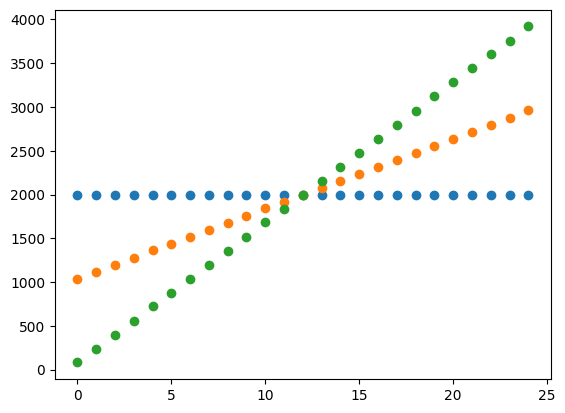

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def generate_custom_partitions(T, N, S):
    """
    Generates N partitions from T datapoints based on the parameter S.
    
    Parameters:
    T (int): Total number of datapoints.
    N (int): Number of partitions.
    S (float): Modulation parameter (0 <= S <= 1).
    
    Returns:
    List[int]: A list of sizes of each partition.
    """
    
    if S < 0 or S > 1:
        raise ValueError("S should be between 0 and 1")
    
    # Base size for each partition if S is 0 (equal sizes)
    base_size = T // N
    remainder = T % N
    
    # Initialize partitions with the base size
    partitions = [base_size] * N
    
    # Distribute the remainder
    for i in range(remainder):
        partitions[i] += 1
    
    if S == 0:
        return partitions  # No variation needed

    # Apply deterministic variation based on S
    max_variation = int(base_size * S)
    
    # Adjust partitions to create the desired distribution
    for i in range(N):
        if i < N / 2:
            variation = int(max_variation * (1 - (i / (N / 2))))
        else:
            variation = int(max_variation * ((i - N / 2) / (N / 2)))
        if i % 2 == 0:
            partitions[i] = max(1, partitions[i] - variation)
        else:
            partitions[i] = min(T, partitions[i] + variation)
    
    # Adjust partitions to ensure the sum is T
    current_sum = sum(partitions)
    diff = T - current_sum
    
    # Adjust the partitions to fix the difference
    for i in range(abs(diff)):
        index = i % N
        if diff > 0:
            partitions[index] += 1
        else:
            if partitions[index] > 1:
                partitions[index] -= 1
    
    return partitions

# Example usage:
T = 50000  # Total number of datapoints
N = 25    # Number of partitions
S = 0.5   # Modulation parameter

partitions = generate_custom_partitions(T, N, S)
# plt.hist(partitions, bins=10, rwidth=0.9)
for S in [0, 0.5, 1]:
    partitions = generate_custom_partitions(T, N, S)
    assert sum(partitions) == T
    partitions.sort()
    # plt.plot(range(25), partitions)
    print(partitions)
    plt.scatter(range(25),partitions)
    # plt.hist(partitions, bins=20, rwidth=0.9)

[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]
[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 3661, 3661, 3661, 3661, 3661, 3661, 3662, 3662, 3662, 3662, 3662, 3662, 3662]
[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]


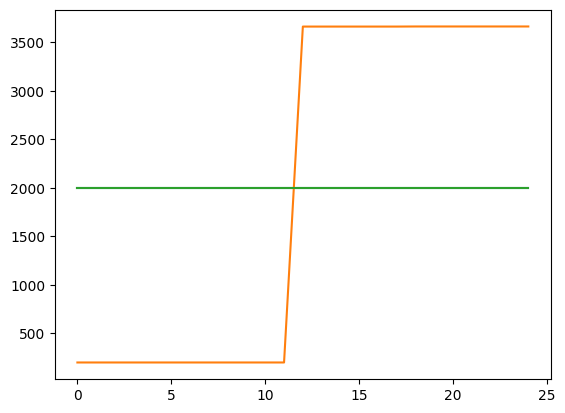

In [37]:
def generate_partitions_with_limits(T, N, S, min_size, max_size):
    """
    Generates N partitions from T datapoints based on the parameter S with specified min and max sizes.
    
    Parameters:
    T (int): Total number of datapoints.
    N (int): Number of partitions.
    S (float): Modulation parameter (0 <= S <= 1).
    min_size (int): Minimum size of each partition.
    max_size (int): Maximum size of each partition.
    
    Returns:
    List[int]: A list of sizes of each partition.
    """
    
    if S < 0 or S > 1:
        raise ValueError("S should be between 0 and 1")
    
    if min_size * N > T or max_size * N < T:
        raise ValueError("The min_size and max_size constraints are not feasible with given T and N")
    
    # For S = 0, distribute equally
    if S == 0:
        base_size = T // N
        partitions = [base_size] * N
        remainder = T % N
        
        for i in range(remainder):
            partitions[i] += 1
        
        return partitions
    
    # Calculate the number of partitions with minimum and maximum sizes based on S
    num_min_partitions = int((1 - S) * N)
    num_max_partitions = N - num_min_partitions
    
    # Assign minimum size to the respective partitions
    partitions = [min_size] * num_min_partitions + [max_size] * num_max_partitions
    
    # Adjust partitions to ensure the total is T
    current_sum = sum(partitions)
    diff = T - current_sum
    
    # Adjust the partitions to fix the difference
    i = 0
    while diff != 0:
        if diff > 0 and partitions[i] < max_size:
            partitions[i] += 1
            diff -= 1
        elif diff < 0 and partitions[i] > min_size:
            partitions[i] -= 1
            diff += 1
        i = (i + 1) % N
    
    return partitions

# Example usage:
min_size = 200  # Minimum size of each partition
max_size = 4000 # Maximum size of each partition
# Example usage:
T = 50000  # Total number of datapoints
N = 25    # Number of partitions
S = 0.5   # Modulation parameter

# partitions = generate_custom_partitions(T, N, S)
# plt.hist(partitions, bins=10, rwidth=0.9)
for S in [0, 0.5, 1]:
    partitions = generate_partitions_with_limits(T, N, S, min_size, max_size)
    assert sum(partitions) == T
    partitions.sort()
    print(partitions)
    plt.plot(range(25), partitions)

In [40]:
import numpy as np

def generate_deterministic_normal_distribution(N, S):
    """
    Generates a deterministic normal distribution with mean 0 and std deviation 1.
    
    Parameters:
    N (int): Number of partitions.
    S (float): Modulation parameter (0 <= S <= 1).
    
    Returns:
    List[float]: A list of normally distributed values.
    """
    x = np.linspace(-3, 3, N)
    normal_distribution = np.exp(-x**2 / 2)
    normal_distribution /= normal_distribution.sum()
    
    # Apply the modulation parameter S
    return normal_distribution * (1 - S) + (S / N)

def generate_partitions_with_limits(T, N, S, min_size, max_size):
    """
    Generates N partitions from T datapoints based on the parameter S with specified min and max sizes.
    
    Parameters:
    T (int): Total number of datapoints.
    N (int): Number of partitions.
    S (float): Modulation parameter (0 <= S <= 1).
    min_size (int): Minimum size of each partition.
    max_size (int): Maximum size of each partition.
    
    Returns:
    List[int]: A list of sizes of each partition.
    """
    
    if S < 0 or S > 1:
        raise ValueError("S should be between 0 and 1")
    
    if min_size * N > T or max_size * N < T:
        raise ValueError("The min_size and max_size constraints are not feasible with given T and N")
    
    # Generate deterministic normal distribution
    normal_distribution = generate_deterministic_normal_distribution(N, S)
    
    # Scale the normal distribution to fit within min_size and max_size constraints
    scaled_distribution = normal_distribution * (max_size - min_size) + min_size
    
    # Calculate initial partition sizes
    partitions = [int(x) for x in scaled_distribution]
    
    # Ensure the total sum is T
    current_sum = sum(partitions)
    diff = T - current_sum
    
    # Adjust the partitions to fix the difference
    i = 0
    while diff != 0:
        if diff > 0 and partitions[i] < max_size:
            partitions[i] += 1
            diff -= 1
        elif diff < 0 and partitions[i] > min_size:
            partitions[i] -= 1
            diff += 1
        i = (i + 1) % N
    
    return partitions

# Example usage:
T = 50000  # Total number of datapoints
N = 25    # Number of partitions
S = 0.0   # Modulation parameter
min_size = 200  # Minimum size of each partition
max_size = 4000 # Maximum size of each partition

partitions = generate_partitions_with_limits(T, N, S, min_size, max_size)
print(partitions)

[1853, 1857, 1865, 1879, 1900, 1931, 1972, 2022, 2079, 2135, 2184, 2215, 2227, 2215, 2183, 2134, 2078, 2021, 1971, 1930, 1899, 1878, 1864, 1856, 1852]
